In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import glob
from PIL import Image
from IPython.display import Image

### Perceptron
The perceptron is the building block of artificial neural network. It is a simplified model of the real neuron that attempts to imitate it by the following process: it takes the input signals, let’s call them x1, x2, …, xn, computes a weighted sum z of those inputs, then passes it through a threshold function ϕ and outputs the result. A perceptron is the simplest neural network, one that is comprised of just one neuron. <br>

We consider an additional input signal x0 that is always set to 1. Finally putting all inputs x0, x1, …, xn, and all weights w0, w1, …, wn into vectors x and w, and output 1 when their dot product is positive and -1 otherwise.<br>

### Decision Boundary
If there are n inputs the decision boundary will be a n-1 dimensional object called a hyperplane that separates our n-dimensional feature space into 2 parts: one in which the points are classified as positive, and one in which the points are classified as negative(by convention, we will consider points that are exactly on the decision boundary as being negative). Hence the perceptron is a binary classifier that is linear in terms of its weights.

### Perceptron Algorithm
The perceptron algorithm is an iterative algorithm that is based on the following simple update rule: <b><i> if y(x.w)<=0: w = w + yx <b><i> <br>

Where y is the label (either -1 or +1) of our current data point x, and w is the weights vector. The dot product x⋅w is just the perceptron’s prediction based on the current weights (its sign is the same with the one of the predicted label). The expression y(x⋅w) can be less than or equal to 0 only if the real label y is different than the predicted label ϕ(x⋅w). So, if there is a mismatch between the true and predicted labels, then we update our weights: w = w+yx; otherwise, we let them as they are.

In [3]:

class Perceptron:    
   ## The fit() method will be used for training the perceptron. It expects as the first parameter a 2D numpy array X. The rows of this array are samples from our dataset, and the columns are the features. 
   # The second parameter, y, is a 1D numpy array that contains the labels for each row of data in X. The third parameter, n_iter, is the number of iterations for which the algorithm runs.
    def fit(self, X, y, n_iter=100): 
        n_samples = X.shape[0]
        n_features = X.shape[1]
        # Add 1 for the bias term
        self.weights = np.zeros((n_features+1,))
        # Add column of 1s
        X = np.concatenate([X, np.ones((n_samples, 1))], axis=1)
        for i in range(n_iter):
            for j in range(n_samples):
                if y[j]*np.dot(self.weights, X[j, :]) <= 0:
                    self.weights += y[j]*X[j, :]
    
    ## The .predict() method will be used for predicting labels of new data.
    # The method expects one parameter, X, of the same shape as in the fit() method. Then 
    def predict(self, X):
        #  It first checks if the weights object attribute exists, if not this means that the perceptron is not trained yet, and shows warning message. 
        if not hasattr(self, 'weights'):
            print('The model is not trained yet!')
            return
        n_samples = X.shape[0]
        # Add column of 1s
        X = np.concatenate([X, np.ones((n_samples, 1))], axis=1)
        # A matrix multiplication is performed between X and the weights, and the result is mapped to either -1 or +1. 
        y = np.matmul(X, self.weights)
        # np.vectorize() is used to apply this mapping to all elements in the resulting vector of matrix multiplication.
        y = np.vectorize(lambda val: 1 if val > 0 else -1)(y)
        return y

    ## The accuracy() method computes and returns the accuracy of the predictions. It expects as parameters an input matrix X and a labels vector y.
    def accuracy(self, X, y):
        pred_y = self.predict(X)
        return np.mean(y == pred_y)

In [4]:
def polynom(indices_list, indices, a, b, p):
    indices = [*indices]
    if p == 0:
        indices_list.append(indices)
        return
    for i in range(a, b):
        indices.append(i)
        polynom(indices_list, indices, i, b, p-1)
        indices = indices[0:-1]

def polynomial_features(X: np.ndarray, p) -> np.ndarray:
    n, d = X.shape
    features = []
    for i in range(1, p+1):
        l = []
        polynom(l, [], 0, d, i)
        for indices in l:
            x = np.ones((n,))
            for idx in indices:
                x = x * X[:, idx]
            features.append(x)
    return np.stack(features, axis=1)

In [5]:
# Plotting the data points
def plot_data_points(ax, X, y):
    neg_class = (y == -1)
    pos_class = (y == 1)
    ax.scatter(X[neg_class, 0], X[neg_class, 1])
    ax.scatter(X[pos_class, 0], X[pos_class, 1])
# Plotting the decision boundaries
def plot_decision_boundary(ax, clf, X, p):
    X_cpy = X.copy()
    margin = 0.5
    x_min = np.min(X_cpy[:, 0])-margin
    x_max = np.max(X_cpy[:, 0])+margin
    y_min = np.min(X_cpy[:, 1])-margin
    y_max = np.max(X_cpy[:, 1])+margin
    n = 1000
    x = np.linspace(x_min, x_max, num=n)
    y = np.linspace(y_min, y_max, num=n)
    x, y = np.meshgrid(x, y)
    X_cpy = np.stack([x.reshape((n*n,)), y.reshape((n*n,))], axis=1)
    X_cpy = polynomial_features(X_cpy, p)
    z = clf.predict(X_cpy)
    z = z.reshape((n, n))
    ax.contour(x, y, z, levels=[0])

In [6]:
def anim_fig(weights, X, y, X_train, y_train, X_test, y_test, out_folder, p, n_iter, i, j, n_samples, iteration_level):
    clf = Perceptron()
    clf.weights = weights

    plt.clf()
    fig, (ax_train, ax_test) = plt.subplots(nrows=1, ncols=2, dpi=120, figsize=(16,6))
    
    if iteration_level:
        plot_data_points(ax_train, X_train, y_train)
    else:
        mask = np.ones((n_samples,), dtype=bool)
        mask[j] = False
        plot_data_points(ax_train, X_train[mask, :], y_train[mask])
        ax_train.scatter(X_train[j, 0], X_train[j, 1], c='lime')
    
    plot_data_points(ax_test, X_test, y_test)

    plot_decision_boundary(ax_train, clf, X, p)
    plot_decision_boundary(ax_test, clf, X, p)

    ax_train.set_title('Train')
    ax_test.set_title('Test')

    if iteration_level:
        fig.suptitle(f'Iteration: {i+1}/{n_iter}', fontsize=14)
    else:
        fig.suptitle(f'Iteration: {i+1}/{n_iter}; Point: {j+1}/{n_samples}', fontsize=14)
    k = i if iteration_level else i*n_samples+j
    plt.savefig(f'{out_folder}/frame{k}.png')
    plt.close(fig)

def perceptron_anim(X, y, X_train, y_train, X_test, y_test, out_folder, iteration_level, p=1, n_iter=100):

    n_samples = X_train.shape[0]
    n_features = X_train.shape[1]

    weights = np.zeros((n_features+1,))

    X_train = np.concatenate([X_train, np.ones((n_samples, 1))], axis=1)

    for i in range(n_iter):
        for j in range(n_samples):
            if y_train[j]*np.dot(weights, X_train[j, :]) <= 0:
                weights += y_train[j]*X_train[j, :]
                
            if not iteration_level:
                anim_fig(weights, X, y, X_train, y_train, X_test, y_test, out_folder, p, n_iter, i, j, n_samples, iteration_level)
        if iteration_level:
            anim_fig(weights, X, y, X_train, y_train, X_test, y_test, out_folder, p, n_iter, i, j, n_samples, iteration_level)

### 1. Xlin sep.npy and ylin sep.npy. This dataset is linearly separable. Run your algorithm for this data and you should achieve 100% train and test accuracies!

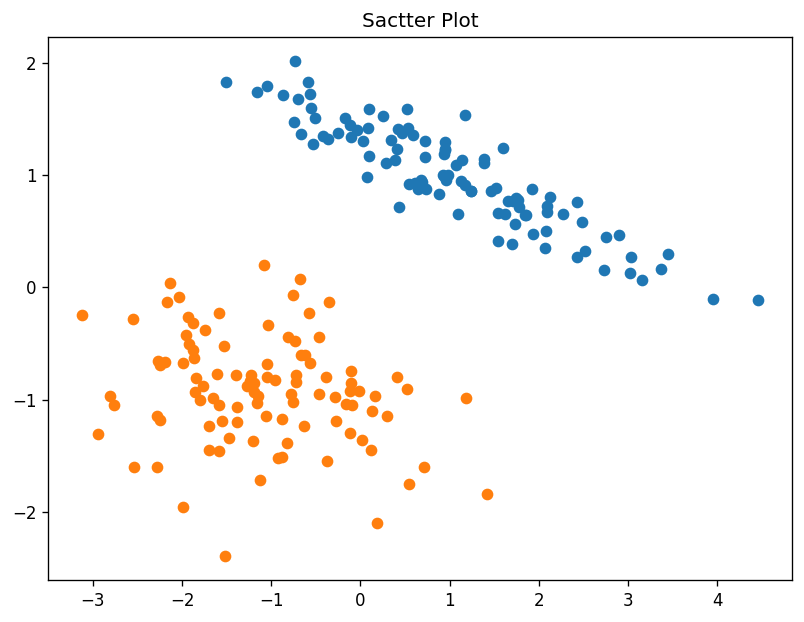

 Accuracy for train dataset:	 100.0
 Accuracy for test dataset:	 100.0


<Figure size 432x288 with 0 Axes>

In [13]:
# Assets generation
X = np.load('Xlin_sep.npy')
y = np.load('ylin_sep.npy')

fig, ax = plt.subplots(nrows=1, ncols=1, dpi=120, figsize=(8,6))
figure = plot_data_points(ax, X, y)
plt.savefig('output/lin_sep/figure.png')
plt.title("Sactter Plot")
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)
perceptron_anim(X, y, X_train, y_train, X_test, y_test, 'output/lin_sep/anim', iteration_level=False, p=1, n_iter=2)
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
accuracy_train = perceptron.accuracy(X_train, y_train)
accuracy_test = perceptron.accuracy(X_test, y_test)

print(" Accuracy for train dataset:\t",accuracy_train*100)
print(" Accuracy for test dataset:\t",accuracy_test*100)

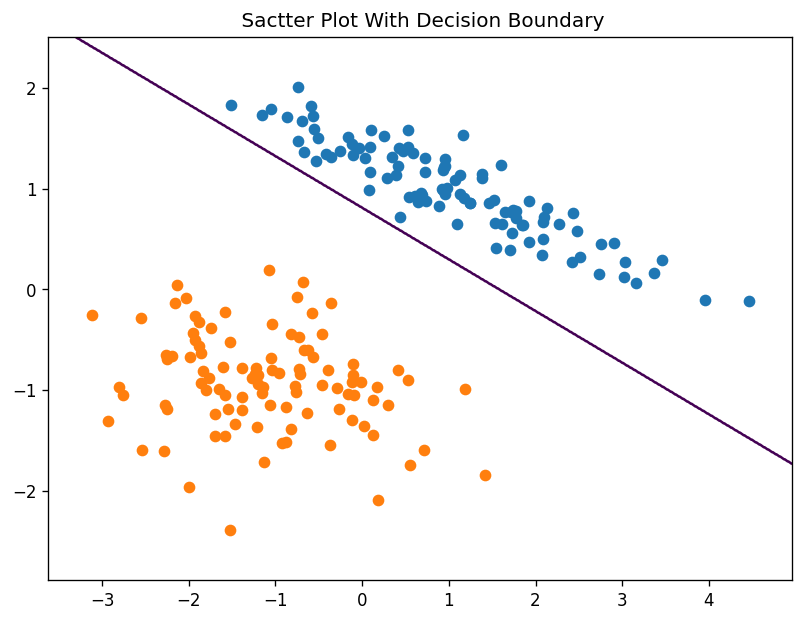

In [14]:
# Plotting The Decision Boundary
fig, ax = plt.subplots(nrows=1, ncols=1, dpi=120, figsize=(8,6))
plot_data_points(ax, X, y)
plt.title(" Sactter Plot With Decision Boundary")
plot_decision_boundary(ax, perceptron, X, 1)
plt.show()

In [15]:
# Defining a function 
import glob
from PIL import Image
def make_gif(frame_folder):
    frames = [Image.open(image) for image in glob.glob(f"{frame_folder}/*.png")]
    # print(frames)
    frame_one = frames[0]
    frame_one.save("anim1.gif", format="GIF", append_images=frames,
               save_all=True, duration=100, loop=0)
    
if __name__ == "__main__":
    make_gif("/Users/sreyashisaha/Desktop/Semester2/ML_LAB/Week7/output/lin_sep/anim")

In [17]:
# Displaying the GIF created
from IPython.display import Image
Image(url='anim1.gif')

### 2. Xlinnoise sep.npy and ylinnoise sep.npy. This dataset is not linearly separable and contains noise. Run your algorithm for this data and observe what happens to the decision boundary in the animation. You should get a test accuracy close to 88%.

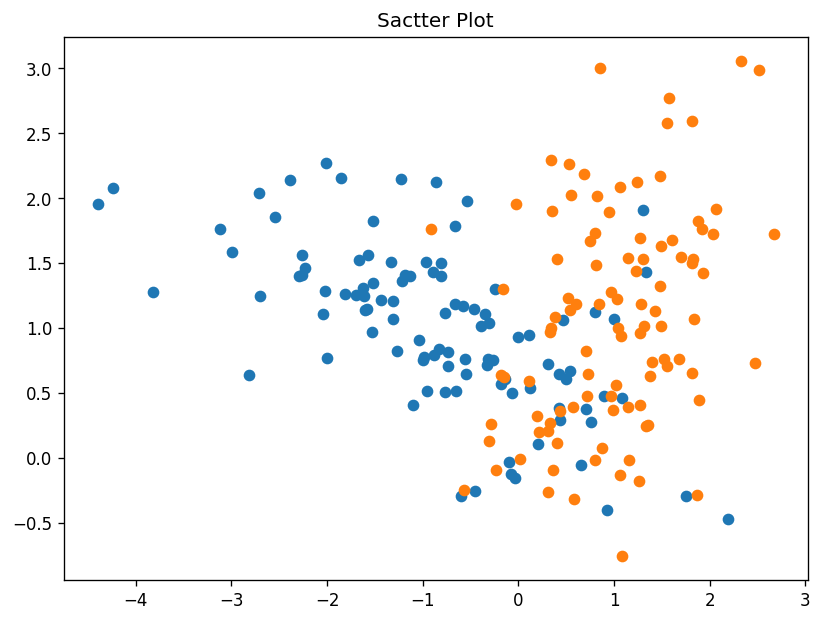

 Accuracy for train dataset:	 53.333333333333336
 Accuracy for test dataset:	 62.0


<Figure size 432x288 with 0 Axes>

In [22]:
# Assets generation

X = np.load('Xlinnoise_sep.npy')
y = np.load('ylinnoise_sep.npy')

fig, ax = plt.subplots(nrows=1, ncols=1, dpi=120, figsize=(8,6))
plot_data_points(ax, X, y)
plt.title("Sactter Plot")
plt.savefig('output/lin_noise/figure.png')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)
perceptron_anim(X, y, X_train, y_train, X_test, y_test, 'output/lin_noise/anim', iteration_level=False, p=1, n_iter=2)
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
accuracy_train = perceptron.accuracy(X_train, y_train)
accuracy_test = perceptron.accuracy(X_test, y_test)

print(" Accuracy for train dataset:\t",accuracy_train*100)
print(" Accuracy for test dataset:\t",accuracy_test*100)

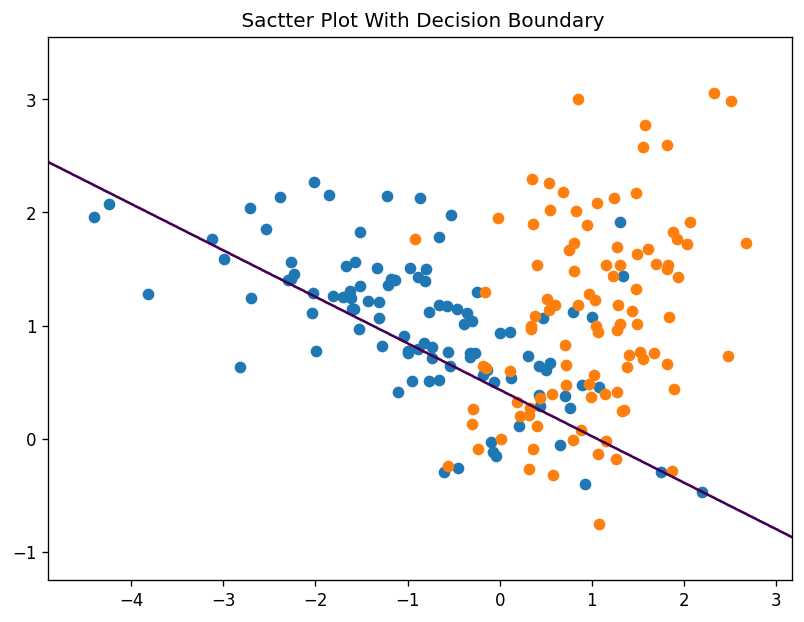

In [23]:
# Plotting The Decision Boundary
fig, ax = plt.subplots(nrows=1, ncols=1, dpi=120, figsize=(8,6))
plot_data_points(ax, X, y)
plt.title(" Sactter Plot With Decision Boundary")
plot_decision_boundary(ax, perceptron, X, 1)
plt.show()

In [25]:
# Function to make a gif image
import glob
from PIL import Image
def make_gif(frame_folder):
    frames = [Image.open(image) for image in glob.glob(f"{frame_folder}/*.png")]
    # print(frames)
    frame_one = frames[0]
    frame_one.save("anim2.gif", format="GIF", append_images=frames,
               save_all=True, duration=100, loop=0)
    
if __name__ == "__main__":
    make_gif("/Users/sreyashisaha/Desktop/Semester2/ML_LAB/Week7/output/lin_noise/anim")

In [26]:
# Displaying the gif image created
from IPython.display import Image
Image(url='anim2.gif')

### 3. circles x and circles y. This dataset is non-linear. Devise a strategy to make the dataset separable linearly. Hint: Polynomial Features. Plot the decision boundary showing how the two classes are separated.

This dataset is separable, but clearly not linear. So a perceptron would not be good for this task. But the thing about a perceptron is that it’s decision boundary is linear in terms of the weights, not necessarily in terms of inputs. We can augment our input vectors x so that they contain non-linear functions of the original inputs. For example, in addition to the original inputs x1 and x2 we can add the terms x1 squared, x1 times x2, and x2 squared.<br>

The polynomial_features(X, p) function defined before transforms the input matrix X into a matrix that contains as features all the terms of a polynomial of degree p. It makes use of the polynom() function which computes a list of indices that represent the columns to be multiplied for obtaining the p-order terms.

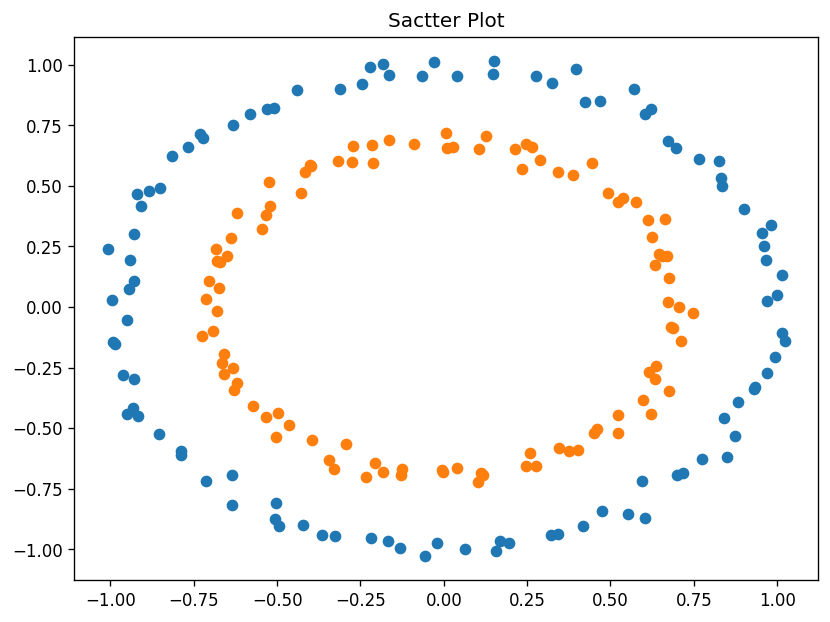

/var/folders/mv/39f6vvvn1kb8pjc2zbvyxr5w0000gn/T/ipykernel_10214/457564116.py:23: UserWarning: No contour levels were found within the data range.
  ax.contour(x, y, z, levels=[0])


 Accuracy for train dataset:	 100.0
 Accuracy for test dataset:	 100.0


<Figure size 432x288 with 0 Axes>

In [27]:
# Assets generation

X = np.load('circles_x.npy')
y = np.load('circles_y.npy')

X = polynomial_features(X, 2)

fig, ax = plt.subplots(nrows=1, ncols=1, dpi=120, figsize=(8,6))
plot_data_points(ax, X, y)
plt.title("Sactter Plot")
plt.savefig('output/circles/figure.png')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

perceptron_anim(X, y, X_train, y_train, X_test, y_test, 'output/circles/anim', iteration_level=False, p=2, n_iter=3)

perceptron = Perceptron()
perceptron.fit(X_train, y_train, n_iter=3)
accuracy_train = perceptron.accuracy(X_train, y_train)
accuracy_test = perceptron.accuracy(X_test, y_test)

print(" Accuracy for train dataset:\t",accuracy_train*100)
print(" Accuracy for test dataset:\t",accuracy_test*100)

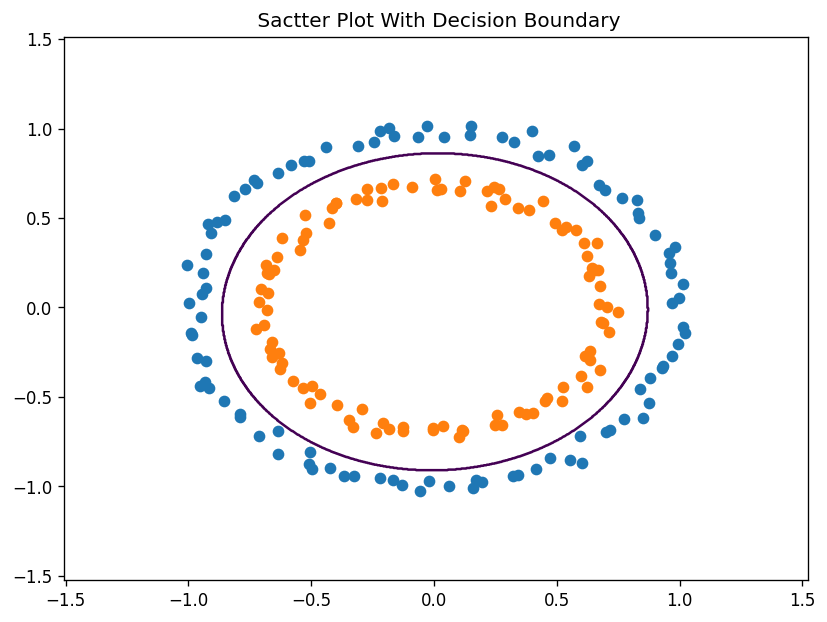

In [28]:
# Plotting The Decision Boundary
fig, ax = plt.subplots(nrows=1, ncols=1, dpi=120, figsize=(8,6))
plot_data_points(ax, X, y)
plt.title(" Sactter Plot With Decision Boundary")
plot_decision_boundary(ax, perceptron, X, 2)
plt.show()

In [29]:
# Function to make a gif image
import glob
from PIL import Image
def make_gif(frame_folder):
    frames = [Image.open(image) for image in glob.glob(f"{frame_folder}/*.png")]
    # print(frames)
    frame_one = frames[0]
    frame_one.save("anim3.gif", format="GIF", append_images=frames,
               save_all=True, duration=100, loop=0)
    
if __name__ == "__main__":
    make_gif("/Users/sreyashisaha/Desktop/Semester2/ML_LAB/Week7/output/circles/anim")

In [30]:
# Displaying the gif image created
from IPython.display import Image
Image(url='anim3.gif')

# The gifs can be viewed from the code and not in the pdf version